In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import quandl
import nasdaqdatalink
from datetime import timedelta 
import random
import csv
import warnings
import numpy as np
from typing import List 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [176]:
df = pd.read_parquet(r'C:\Users\16177\Desktop\work\QTS\Project\master_crypto_data_2015-01-01_2025-02-24_1d.parquet', engine="pyarrow") 
df['Open time'] = pd.to_datetime(df['Open time']) 
df['Close'] = df['Close'].astype(float)

In [177]:
tickers  =  df['Ticker'].unique() 

In [178]:
df = df.set_index(['Ticker','Open time'])
df

Open           High  \
Ticker    Open time                                                 
BTCUSDT   2019-09-23 00:00:00+00:00  9930.13000000  9930.13000000   
          2019-09-24 00:00:00+00:00  9637.93000000  9665.05000000   
          2019-09-25 00:00:00+00:00  8528.12000000  8724.77000000   
          2019-09-26 00:00:00+00:00  8434.45000000  8453.20000000   
          2019-09-27 00:00:00+00:00  8078.75000000  8259.96000000   
...                                            ...            ...   
NEIROUSDT 2025-02-22 00:00:00+00:00     0.00036830     0.00044590   
          2025-02-23 00:00:00+00:00     0.00039728     0.00043262   
          2025-02-24 00:00:00+00:00     0.00038312     0.00042142   
          2025-02-25 00:00:00+00:00     0.00032220     0.00041716   
          2025-02-26 00:00:00+00:00     0.00037167     0.00040883   

                                               Low        Close        Volume  \
Ticker    Open time                                                             
BTCUSDT   2019-09-23 00:00:00+00:00  9930.13000000  9930.130000    0.00100000   
          2019-09-24 00:00:00+00:00  7996.45000000  8519.670000  202.35079900   
          2019-09-25 00:00:00+00:00  8247.78000000  8435.280000   55.41797100   
          2019-09-26 00:00:00+00:00  7761.87000000  8064.410000   41.88007900   
          2019-09-27 00:00:00+00:00  7858.58000000  8178.730000   47.14290400   
...                                            ...          ...           ...   
NEIROUSDT 2025-02-22 00:00:00+00:00     0.00035281     0.000437    7017510.00   
          2025-02-23 00:00:00+00:00     0.00037002     0.000383   14115426.00   
          2025-02-24 00:00:00+00:00     0.00032220     0.000322  211463527.00   
          2025-02-25 00:00:00+00:00     0.00030600     0.000372    7348144.00   
          2025-02-26 00:00:00+00:00     0.00033455     0.000401    2275078.00   

                                        Close time Quote asset volume  \
Ticker    Open time                                                     
BTCUSDT   2019-09-23 00:00:00+00:00  1569283199999         9.93013000   
          2019-09-24 00:00:00+00:00  1569369599999   1739432.08920509   
          2019-09-25 00:00:00+00:00  1569455999999    469361.69055629   
          2019-09-26 00:00:00+00:00  1569542399999    340923.66601370   
          2019-09-27 00:00:00+00:00  1569628799999    379917.99846542   
...                                            ...                ...   
NEIROUSDT 2025-02-22 00:00:00+00:00  1740268799999      2906.92565489   
          2025-02-23 00:00:00+00:00  1740355199999      5717.43299936   
          2025-02-24 00:00:00+00:00  1740441599999     68355.16999234   
          2025-02-25 00:00:00+00:00  1740527999999      2494.84836495   
          2025-02-26 00:00:00+00:00  1740614399999       861.09796138   

                                    Number of trades  \
Ticker    Open time                                    
BTCUSDT   2019-09-23 00:00:00+00:00                1   
          2019-09-24 00:00:00+00:00             2345   
          2019-09-25 00:00:00+00:00              763   
          2019-09-26 00:00:00+00:00             1023   
          2019-09-27 00:00:00+00:00              990   
...                                              ...   
NEIROUSDT 2025-02-22 00:00:00+00:00               58   
          2025-02-23 00:00:00+00:00               33   
          2025-02-24 00:00:00+00:00               84   
          2025-02-25 00:00:00+00:00               57   
          2025-02-26 00:00:00+00:00               19   

                                    Taker buy base asset volume  \
Ticker    Open time                                               
BTCUSDT   2019-09-23 00:00:00+00:00                  0.00000000   
          2019-09-24 00:00:00+00:00                125.93546400   
          2019-09-25 00:00:00+00:00                 29.05942700   
          2019-09-26 00:00:00+00:00                 19.80884900   
          201

In [179]:
returns = pd.DataFrame()  # Empty DataFrame to store returns

for ticker in tickers:
    rets = df.loc[ticker, 'Close'].pct_change()  
    rets.name = ticker  
    returns = returns.join(rets, how='outer') if not returns.empty else rets.to_frame()
    

In [180]:
returns = returns.iloc[:,:40]
returns.dropna(inplace=True)
returns

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,BNBUSDT,ADAUSDT,BATUSDT,ETCUSDT,XLMUSDT,...,FILUSDT,AAVEUSDT,GRTUSDT,SHIBUSDT,CRVUSDT,AXSUSDT,AVAXUSDT,CTSIUSDT,DOTUSDT,YFIUSDT
Open time,,,,,,,,,,,,,,,,,,,,,
2023-07-14 00:00:00+00:00,-0.036280,-0.032367,1.424977,-0.043019,-0.067654,-0.031053,-0.072357,-0.029605,-0.049254,-0.113666,...,-0.043648,0.026889,-0.018977,0.003783,-0.042503,-0.049924,0.041252,-0.022005,-0.012162,-0.043832
2023-07-15 00:00:00+00:00,-0.000810,-0.002257,-0.005972,-0.036571,-0.003786,0.010548,-0.005484,0.014528,0.002093,-0.045219,...,0.001817,-0.018703,0.010934,0.013819,0.012330,-0.009554,0.010929,0.000000,-0.003124,0.023497
2023-07-16 00:00:00+00:00,-0.002090,-0.005405,0.046248,-0.011467,-0.020163,-0.028904,-0.037071,-0.030072,-0.020366,0.020963,...,-0.019719,-0.027954,-0.018303,-0.027261,-0.003654,0.003215,-0.033784,-0.005000,-0.020645,-0.005634
2023-07-17 00:00:00+00:00,-0.002335,-0.004513,-0.013088,-0.029600,-0.008942,0.007441,-0.007000,0.013780,0.011727,-0.018251,...,0.001618,-0.016993,0.023729,-0.002548,-0.012225,0.017628,0.011189,-0.033920,-0.006023,-0.011190
2023-07-18 00:00:00+00:00,-0.009626,-0.008153,0.058863,0.006595,-0.006849,-0.018876,-0.011855,-0.047573,-0.019494,0.023238,...,-0.014312,-0.043883,-0.042219,-0.017880,-0.029703,-0.022047,-0.045643,0.001951,-0.017989,-0.018765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-22 00:00:00+00:00,0.003772,0.039159,0.002725,0.030119,-0.018899,0.031094,0.015086,0.029659,0.024635,0.027027,...,0.063038,0.022644,0.071811,0.039867,0.023647,0.003311,0.052589,0.056112,-0.001186,0.000000
2025-02-23 00:00:00+00:00,-0.003796,0.021104,-0.002096,0.018040,0.027031,-0.013962,-0.003231,-0.003804,0.027969,-0.001495,...,-0.026323,-0.007851,-0.042766,-0.012141,-0.017619,-0.033475,-0.037568,-0.031309,-0.020784,0.066001
2025-02-24 00:00:00+00:00,-0.048744,-0.109873,-0.115196,-0.110296,-0.116240,-0.070328,-0.116816,-0.108020,-0.109785,-0.106020,...,-0.109626,-0.147541,-0.099777,-0.120957,-0.124352,-0.080732,-0.119920,-0.128306,-0.109157,-0.126846


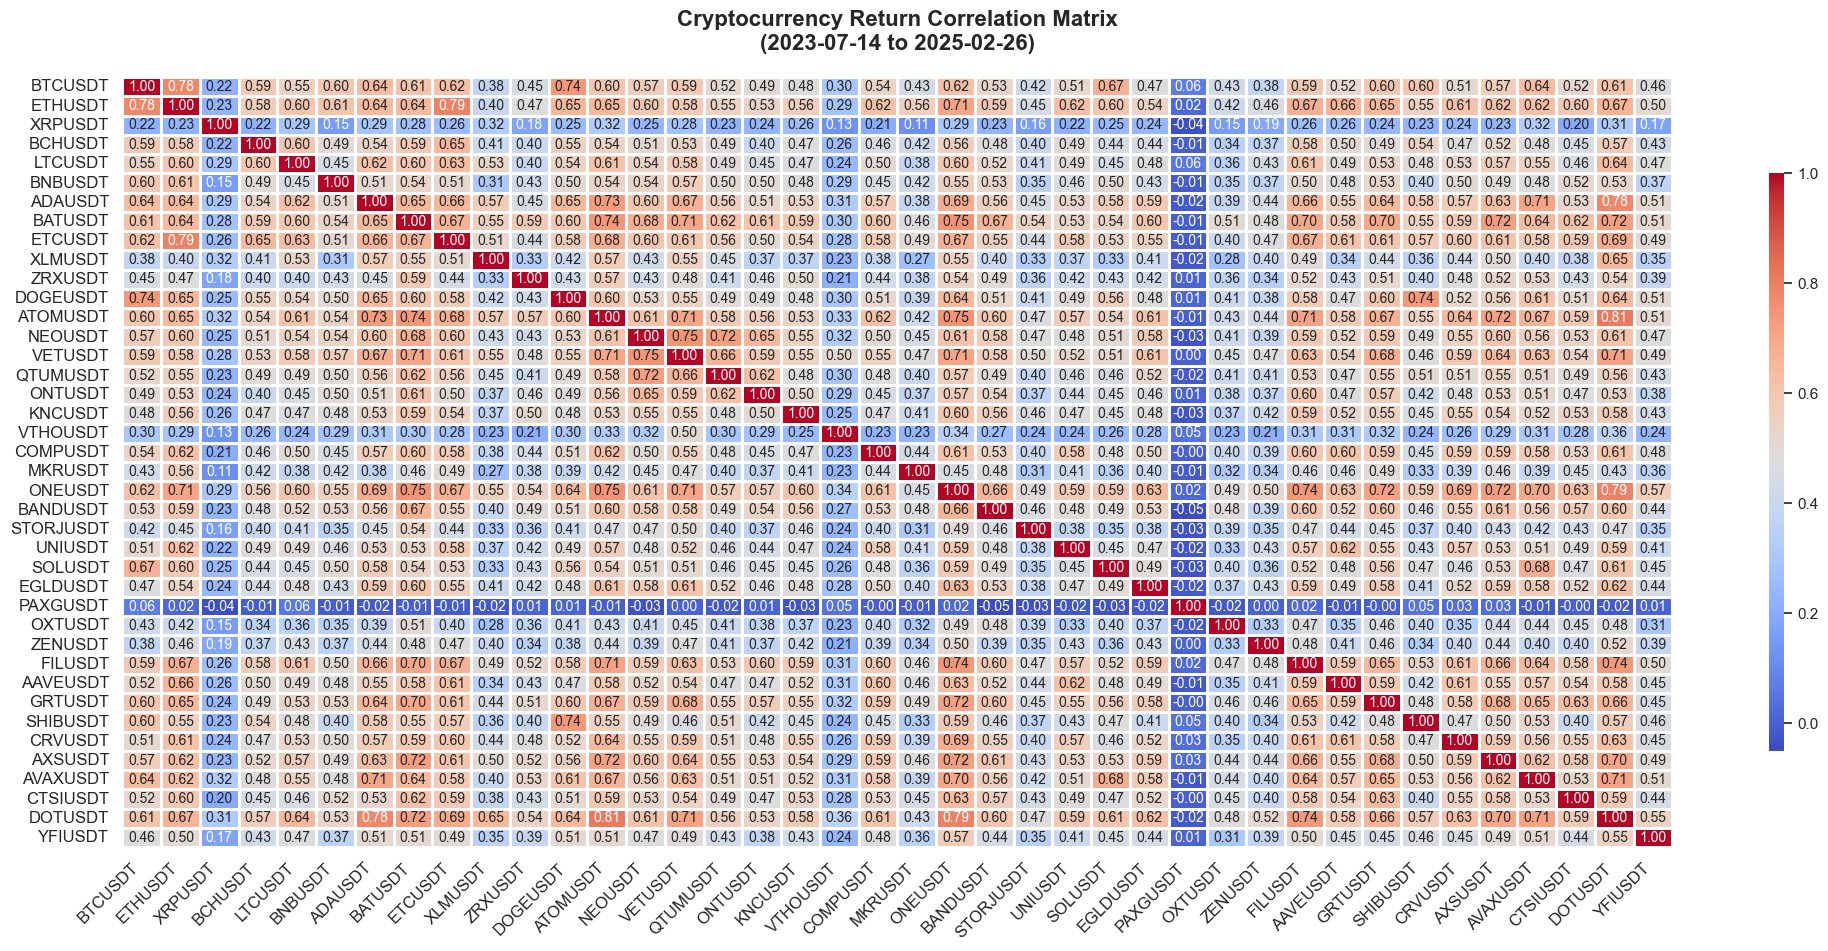

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = returns.corr()

# Set figure size and style
plt.figure(figsize=(25, 10))
sns.set_theme(style="whitegrid")

# Create heatmap with enhanced aesthetics
ax = sns.heatmap(
    corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.75,
    annot_kws={"size": 10},  # Adjust annotation font size
    cbar_kws={"shrink": 0.75, "aspect": 40}  # Adjust color bar size
)

# Add a more prominent title
plt.title(
    "Cryptocurrency Return Correlation Matrix\n(2023-07-14 to 2025-02-26)", 
    fontsize=16, fontweight="bold", pad=20
)

# Improve tick label visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Show the plot
plt.show()


In [196]:
regression = pd.DataFrame(index = returns.columns[2:])
residual_returns = pd.DataFrame(columns=returns.columns[2:])

for ticker in returns.columns[2:]: 

    X = returns[['BTCUSDT','ETHUSDT']]
    Y = returns[ticker] 
    X = sm.add_constant(X)

    model = sm.OLS(Y,X).fit() 

    alpha = model.params[0] 
    alpha_p = model.pvalues[0]
    beta = model.params[1] 
    beta_p = model.pvalues[1] 
    gamma = model.params[2]  
    gamma_p = model.pvalues[2] 

    regression.loc[ticker, 'Alpha'] = alpha 
    regression.loc[ticker, 'Alpha P Value'] = alpha_p
    regression.loc[ticker, 'Beta'] = beta
    regression.loc[ticker, 'Beta P Value'] = beta_p
    regression.loc[ticker, 'Gamma'] = gamma
    regression.loc[ticker, 'Gamma P Value'] = gamma_p

    residual_returns[ticker] = model.resid
     



    

In [191]:
regression

,Alpha,Alpha P Value,Beta,Beta P Value,Gamma,Gamma P Value
XRPUSDT,0.004276,0.134025,0.291751,1.094886e-01,0.336958,2.206376e-02
BCHUSDT,-0.000597,0.699717,0.662279,4.893152e-11,0.466128,8.334944e-09
LTCUSDT,-0.000124,0.919767,0.308063,9.592416e-05,0.533502,2.581821e-16
BNBUSDT,0.000913,0.302261,0.347450,1.405533e-09,0.325332,2.700089e-12
ADAUSDT,0.000365,0.772528,0.575637,2.584766e-12,0.495331,9.617817e-14
BATUSDT,-0.001006,0.435535,0.473701,1.391853e-08,0.569754,8.216035e-17
ETCUSDT,-0.000174,0.862608,0.000014,9.998275e-01,1.021901,3.630681e-67
XLMUSDT,0.001117,0.554644,0.385572,1.479233e-03,0.397416,5.092228e-05
ZRXUSDT,0.000607,0.784779,0.498793,4.742386e-04,0.629490,5.681114e-08
DOGEUSDT,0.000389,0.764118,1.132076,3.588929e-37,0.283944,2.465219e-05


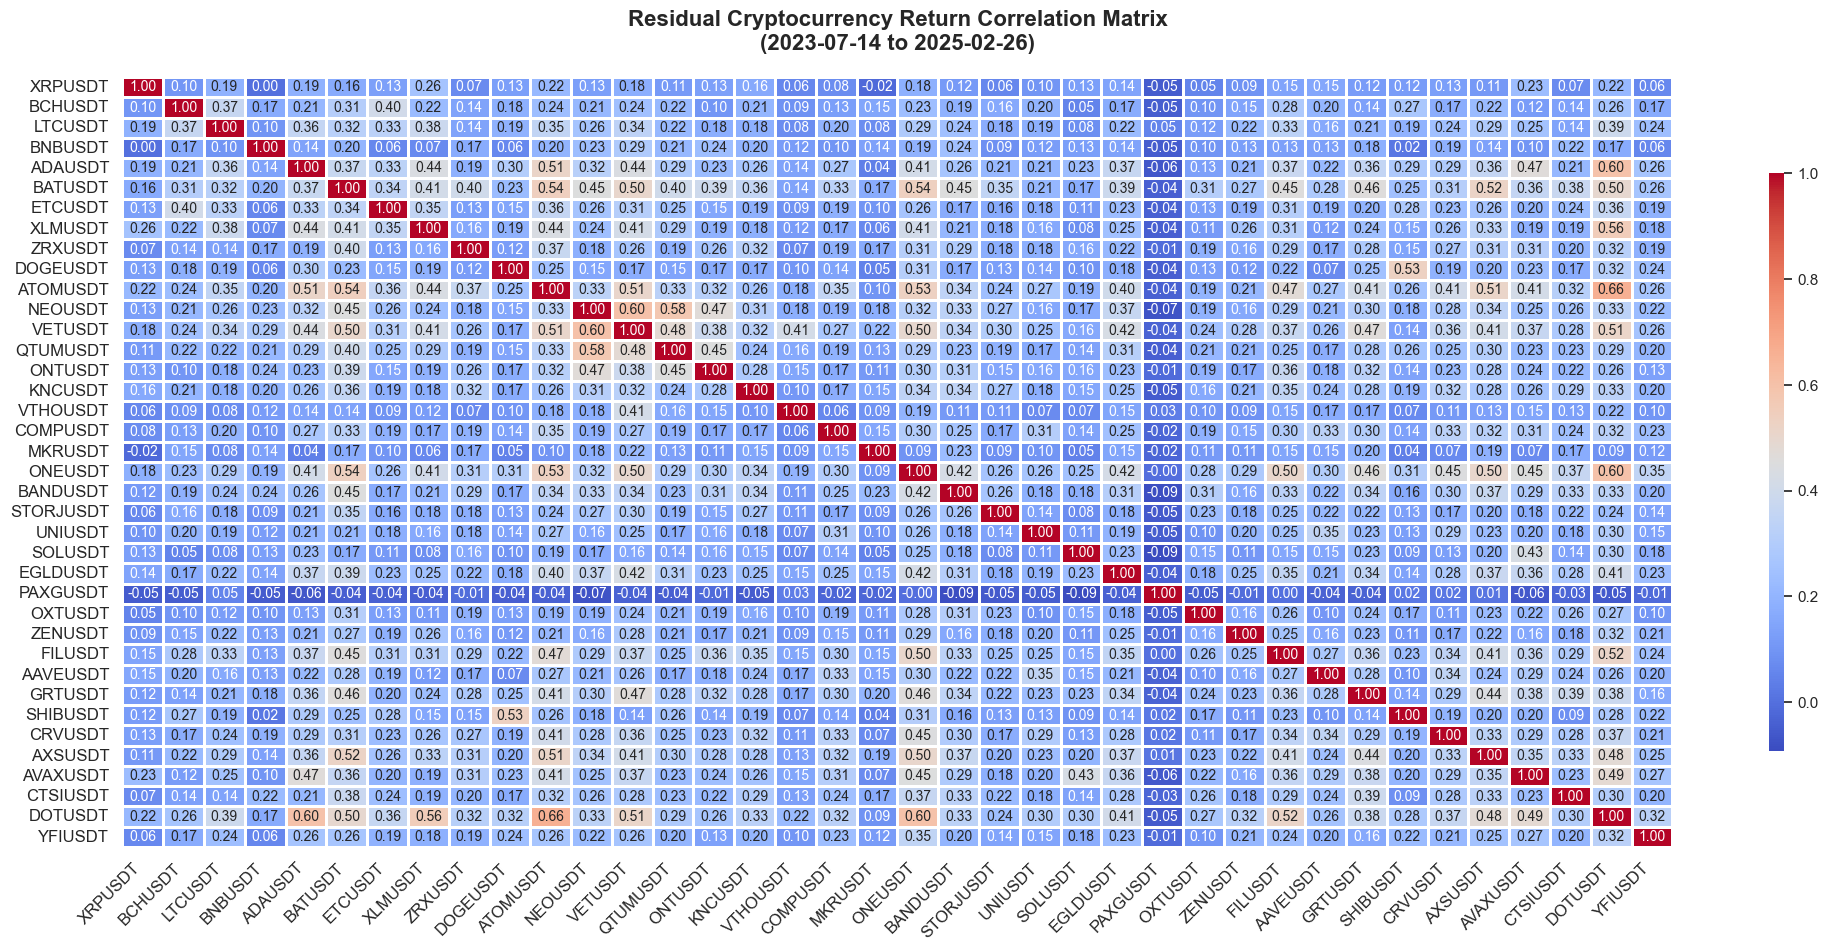

In [204]:


# Compute correlation matrix
corr = residual_returns.corr()

# Set figure size and style
plt.figure(figsize=(25, 10))
sns.set_theme(style="whitegrid")

# Create heatmap with enhanced aesthetics
ax = sns.heatmap(
    corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.75,
    annot_kws={"size": 10},  # Adjust annotation font size
    cbar_kws={"shrink": 0.75, "aspect": 40}  # Adjust color bar size
)

# Add a more prominent title
plt.title(
    "Residual Cryptocurrency Return Correlation Matrix\n(2023-07-14 to 2025-02-26)", 
    fontsize=16, fontweight="bold", pad=20
)

# Improve tick label visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Show the plot
plt.show()


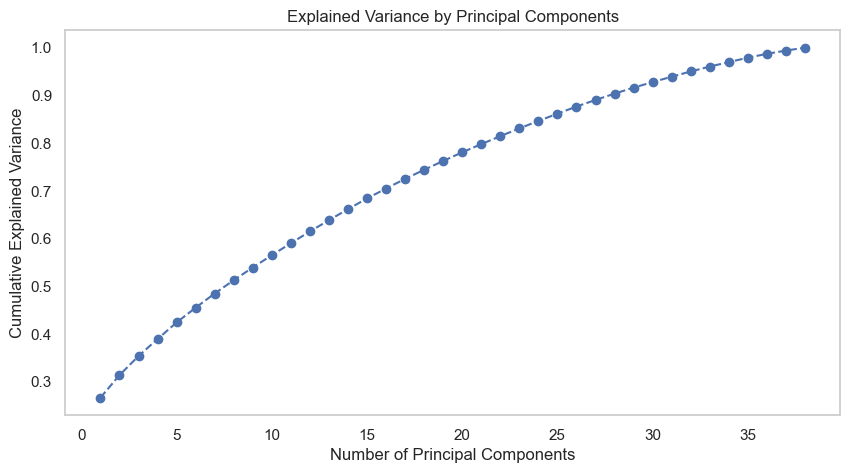

Selected 28 principal components explaining 90.37% of variance.
                                PC1       PC2       PC3       PC4       PC5  \
Open time                                                                     
2023-07-14 00:00:00+00:00  3.308454  2.866084 -2.776123 -5.146075 -0.242695   
2023-07-15 00:00:00+00:00  1.083823 -0.449122 -1.779109  0.583322  1.098558   
2023-07-16 00:00:00+00:00 -2.026384 -0.836896  0.345895  0.261618 -0.551662   
2023-07-17 00:00:00+00:00  1.047512 -0.314555  0.059423 -0.141019  0.111196   
2023-07-18 00:00:00+00:00 -1.953944  1.252726  0.757439  0.204207 -0.711569   

                                PC6       PC7       PC8       PC9      PC10  \
Open time                                                                     
2023-07-14 00:00:00+00:00  5.913336 -4.576775 -5.027481  7.456099  4.524018   
2023-07-15 00:00:00+00:00  1.048724  0.036392  0.534446 -0.461591 -1.444059   
2023-07-16 00:00:00+00:00 -0.389318 -0.487355  0.826257 -0.799401 

In [206]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assume df_returns is your DataFrame of returns (rows = time, columns = assets)
df_returns = residual_returns.dropna()  # Ensure no NaNs

# Step 1: Standardize the data (PCA works best when data is normalized)
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(df_returns)

# Step 2: Apply PCA
pca = PCA(n_components=None)  # Keep all components initially
pca.fit(returns_scaled)

# Step 3: Explained Variance Ratio (to determine optimal components)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Plot the variance explained
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

# Step 5: Choose number of components (e.g., first N components explaining ~90% variance)
n_components = np.argmax(explained_variance >= 0.90) + 1  # Find min components for 90% variance
pca = PCA(n_components=n_components)
returns_pca = pca.fit_transform(returns_scaled)

# Step 6: Convert PCA results back to DataFrame
df_pca = pd.DataFrame(returns_pca, index=df_returns.index, columns=[f"PC{i+1}" for i in range(n_components)])

print(f"Selected {n_components} principal components explaining {explained_variance[n_components-1]:.2%} of variance.")
print(df_pca.head())


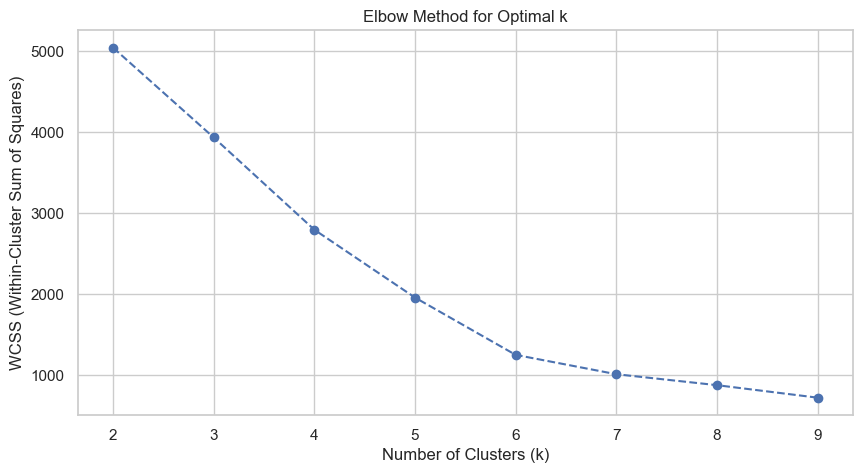

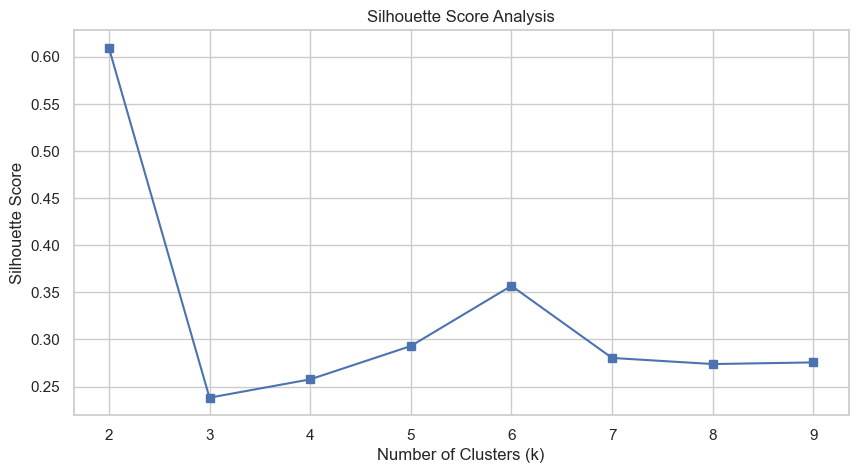

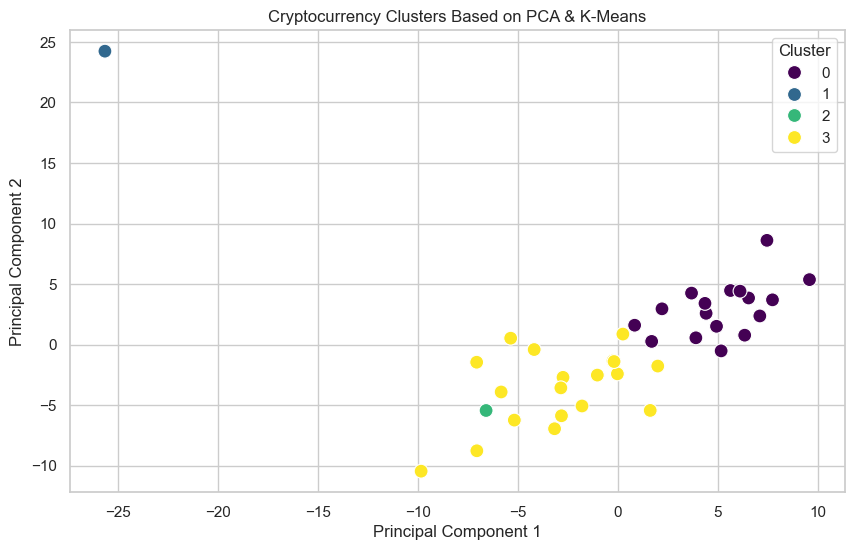

XRPUSDT      0
BCHUSDT      0
LTCUSDT      0
BNBUSDT      0
ADAUSDT      0
BATUSDT      3
ETCUSDT      0
XLMUSDT      0
ZRXUSDT      3
DOGEUSDT     0
ATOMUSDT     3
NEOUSDT      3
VETUSDT      3
QTUMUSDT     3
ONTUSDT      3
KNCUSDT      3
VTHOUSDT     3
COMPUSDT     0
MKRUSDT      0
ONEUSDT      3
BANDUSDT     3
STORJUSDT    3
UNIUSDT      0
SOLUSDT      0
EGLDUSDT     3
PAXGUSDT     0
OXTUSDT      1
ZENUSDT      2
FILUSDT      3
AAVEUSDT     0
GRTUSDT      3
SHIBUSDT     0
CRVUSDT      3
AXSUSDT      3
AVAXUSDT     3
CTSIUSDT     3
DOTUSDT      0
YFIUSDT      0
Name: Cluster, dtype: int32


In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume df_returns is your DataFrame of returns (rows = time, columns = assets)
df_returns = residual_returns.dropna()  # Ensure no missing values

# Step 1: Standardize the data
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(df_returns.T)  # Transpose so assets are rows

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Keep the first 5 principal components
returns_pca = pca.fit_transform(returns_scaled)

# Convert PCA results to DataFrame
df_pca = pd.DataFrame(returns_pca, index=df_returns.columns, columns=[f"PC{i+1}" for i in range(5)])

# Step 3: Find Optimal Number of Clusters (Elbow Method)
wcss = []  # Within-cluster sum of squares
silhouette_scores = []

for k in range(2, 10):  # Trying different k values
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to cluster center
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='s', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

# Step 4: Apply K-Means with the chosen k (e.g., k=4 based on the plots)
optimal_k = 4  # Adjust based on elbow & silhouette method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_pca["Cluster"] = kmeans.fit_predict(df_pca)

# Step 5: Visualize Clusters in First Two Principal Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["Cluster"], palette="viridis", s=100)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Cryptocurrency Clusters Based on PCA & K-Means")
plt.legend(title="Cluster")
plt.show()

# Step 6: Assign Cluster Labels to Original Data
cluster_labels = df_pca["Cluster"]
print(cluster_labels)  # Displays which cluster each cryptocurrency belongs to
